# PART 2 : Definition of a metric

Define a metric in this dataset, which means define a dissimilarity between the
samples, by taking into account all their features (columns of the dataset). Remember that you choose what is represented by your metric. There is no bad or good metric per se.
Some features are numerical and others are categorical, hence you can not use a
standard euclidean metric, and you need to define a custom metric

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Connecting musical genres
We are going to create a dictionary that will represent the similarities between musical genres so that we can use their similarities and differences in our dissimilarity.

In [25]:
music_similarities = {
    'trap': {'trap': 1.0, 'hiphop': 0.8, 'metal': 0.5, 'rock': 0.6, 'rap': 0.7, 'classical': 0.3, 'jazz': 0.4, 'technical death metal': 0.4, 'other': 0.5},
    'hiphop': {'trap': 0.8, 'hiphop': 1.0, 'metal': 0.4, 'rock': 0.6, 'rap': 0.9, 'classical': 0.2, 'jazz': 0.3, 'technical death metal': 0.3, 'other': 0.5},
    'metal': {'trap': 0.5, 'hiphop': 0.4, 'metal': 1.0, 'rock': 0.8, 'rap': 0.3, 'classical': 0.1, 'jazz': 0.2, 'technical death metal': 0.9, 'other': 0.5},
    'rock': {'trap': 0.6, 'hiphop': 0.6, 'metal': 0.8, 'rock': 1.0, 'rap': 0.5, 'classical': 0.2, 'jazz': 0.3, 'technical death metal': 0.8, 'other': 0.5},
    'rap': {'trap': 0.7, 'hiphop': 0.9, 'metal': 0.3, 'rock': 0.5, 'rap': 1.0, 'classical': 0.2, 'jazz': 0.3, 'technical death metal': 0.3, 'other': 0.5},
    'classical': {'trap': 0.3, 'hiphop': 0.2, 'metal': 0.1, 'rock': 0.2, 'rap': 0.2, 'classical': 1.0, 'jazz': 0.7, 'technical death metal': 0.1, 'other': 0.5},
    'jazz': {'trap': 0.4, 'hiphop': 0.3, 'metal': 0.2, 'rock': 0.3, 'rap': 0.3, 'classical': 0.7, 'jazz': 1.0, 'technical death metal': 0.2, 'other': 0.5},
    'technical death metal': {'trap': 0.4, 'hiphop': 0.3, 'metal': 0.9, 'rock': 0.8, 'rap': 0.3, 'classical': 0.1, 'jazz': 0.2, 'technical death metal': 1.0, 'other': 0.5},
    'other': {'trap': 0.5, 'hiphop': 0.5, 'metal': 0.5, 'rock': 0.5, 'rap': 0.5, 'classical': 0.5, 'jazz': 0.5, 'technical death metal': 0.5, 'other': 0.5}
}

### Weight of our features

We create variables containing the weight of each features

In [29]:
age_dissimilarity = 2
height_dissimilarity = 0.5
musical_dissimilarity = 2
job_dissimilarity = 1
city_dissimilarity = 2

### Creation of the metric
We are going to calculate the dissimilarities between 2 samples given based on the weight of the features

In [36]:
def dissimilarities(sample1, sample2):
    tot_dissimilarities = 0

    # Age and height dissimilarities
    age_diff = np.abs(sample1['age'] - sample2['age'])
    tot_dissimilarities += age_dissimilarity * np.sqrt(age_diff ** 2)
    height_diff = np.abs(sample1['height'] - sample2['height'])
    tot_dissimilarities += height_dissimilarity * np.sqrt(height_diff ** 2)

    # Favorite music style dissimilarity
    music_style1 = sample1['favorite music style']
    music_style2 = sample2['favorite music style']
    tot_dissimilarities += musical_dissimilarity * (1 - music_similarities.get(music_style1).get(music_style2))

    # Job and city dissimilarities
    tot_dissimilarities += job_dissimilarity if sample1['job'] != sample2['job'] else 0
    tot_dissimilarities += city_dissimilarity if sample1['city'] != sample2['city'] else 0

    return np.sqrt(tot_dissimilarities)

In [31]:
# Data standardization of numerical columns (age and height)
def standardize_data(data):
    scaler = MinMaxScaler()

    age_height = ['age', 'height'] 
    dataset[age_height] = scaler.fit_transform(dataset[age_height])

We load the dataset, standardize the data, create a dissimilarity matrix between each person in the loaded dataset

In [32]:
def calculate_dissimilarities(dataset):
# Initialize dissimilarity matrix
    size_dataset = len(dataset)
    dissimilarities_matrix = np.zeros((size_dataset, size_dataset))

# Calculate dissimilarities
    for x in range(size_dataset):
        for y in range(x, size_dataset):
            res = dissimilarities(dataset.iloc[x], dataset.iloc[y])
            dissimilarities_matrix[x, y] = res
            dissimilarities_matrix[y, x] = res

    return dissimilarities_matrix

dataset = pd.read_csv('dataset.csv')
data_normalized = standardize_data(dataset)
dissimilarities_matrix = calculate_dissimilarities(dataset)

We plot our matrix

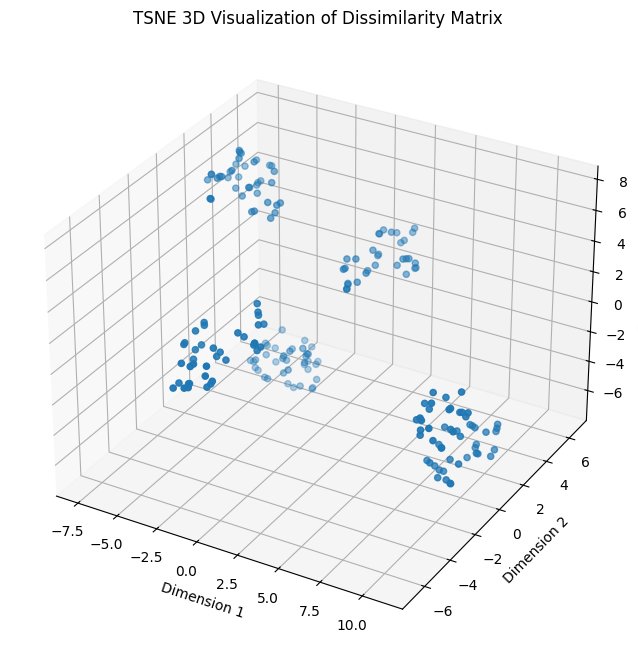

In [38]:
# TSNE for dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
dissimilarity_3d = tsne.fit_transform(dissimilarities_matrix)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dissimilarity_3d[:, 0], dissimilarity_3d[:, 1], dissimilarity_3d[:, 2])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('TSNE 3D Visualization of Dissimilarity Matrix')
plt.show()

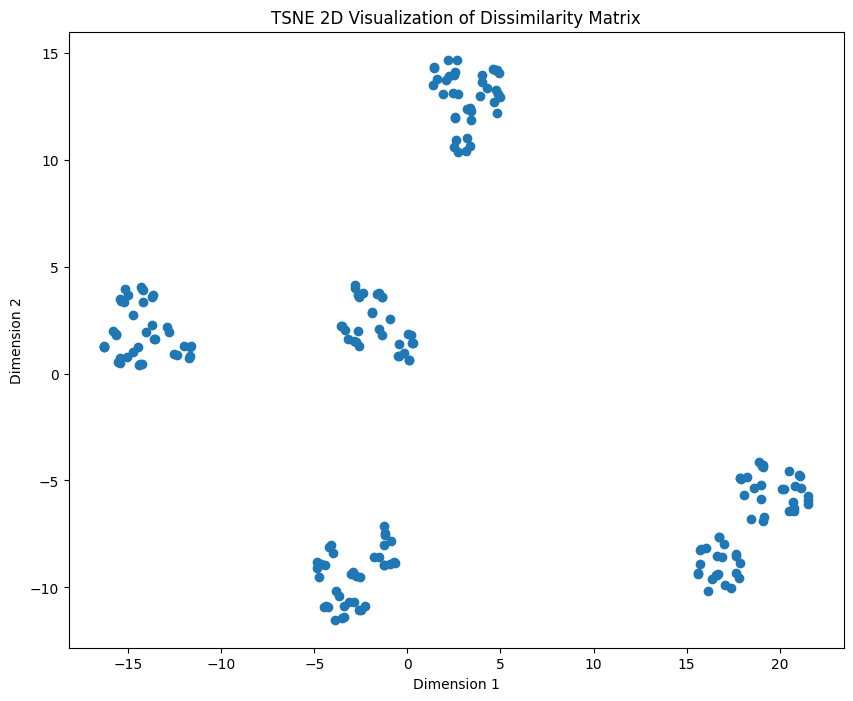

In [39]:
# Apply TSNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
dissimilarity_2d = tsne.fit_transform(dissimilarities_matrix)

# Plot the 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(dissimilarity_2d[:, 0], dissimilarity_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('TSNE 2D Visualization of Dissimilarity Matrix')
plt.show()

## Conclusion

We can see that 5/6 clusters have been formed.
The data we have highlighted the most for these clusters are the age, the city and the type of music a person listens to.